  <div  style="color:#303030;font-family:'arial blACK', sans-serif,monospace; text-align: center; padding: 50px 0; vertical-align:middle;" > <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/Lightbulb.png?raw=true" style=" background:linear-gradient(to right,#FDC86E,#fbb144);border-radius:10px;width:150px;text-align:left; margin-left:10%"  /> <span style="position:relative; bottom:70px; margin-left:5%;font-size:170%;"> PPG from Smartphone Camera </span> </div>

## <span style="color:#fbb144;"> Keywords: </span>

```Photoplethysmogram (PPG)```, ```Smartphone```, ```Camera```

# I. Introduction
<br>
<div class="title"style="width:100%; background:linear-gradient(to right,#FDC86E,#fbb144);font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>

Nowadays, almost everyone has one smartphone. These devices are equipped with powerful cameras and a white light source, the flash LED, and are capable of recording videos at 30 frames per second.
Placing the finger over the phone flash and black camera, the volume changes of blood flow are noticeable on the intensity of the video and it is possible to extract the photoplethysmogram from this source.

## <div style="color:#fbb144"> 1. Background </div>

The photoplethysmogram (PPG) is a widely used medical exam which is capable of measuring blood volume changes.
A light source illuminates the finger and the transmitted or reflected light is measured.
Blood contains hemoglobyn which absorves light with wavelengths in the visible spectrum. The absorption is depedent of the incident wavelength as can be seen in the following Figure:
<br>
<img style="display:block;margin:auto" src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/C.Signal_Processing_IMG/c007/XNoJQ7U.png?raw=true"/>
<p style="text-align: center;"><i>https://omlc.org/spectra/hemoglobin/</i></p>

When emitting light to the finger, the surrounding tissues also reflect part of the light, but, since these tissues are static, the amount of light reflected is constant and constitutes a DC signal. When there is an increase in blood flow, e.g., during cardiac systole, the volume of blood in the finger blood vessels increases, resulting in a variation of the level of light reflected, generating an AC signal, which is time-dependent.
The PPG signal results from this AC signal and it is possible to retrieve it using only the smartphone flash which acts as a light source and the phone camera which acts as a light sensor.

## <div style="color:#fbb144"> 2. Objectives</div>
* Understand how the PPG is measured
* Record a suitable video (optional)
* Learn how to iterate over and process every frame of a video
* Extract the PPG signal from a video

## <div style="color:#fbb144"> 3. Materials </div>
* Python 3.5 (or higher)
* matplotlib
* numpy
* opencv-python
* Smartphone (optional)

# II. Experimental
<br>
<div style="width:100%; background:linear-gradient(to right,#FDC86E,#fbb144);color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px; margin-top:-15px" > </div>


### <div style="color:#fbb144">  1. Requirements </div>
In this section, the libraries required should be installed, using the command:

In [ ]:
!pip3 install matplotlib numpy opencv-python biosppy >/dev/null 2>&1


and imported:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import biosppy.signals.tools as st

### <div style="color:#fbb144">  2. Data Acquisition </div>
This step is optional. If you wish to use the example video, download it [here](https://raw.githubusercontent.com/PIA-Group/ScientIST-notebooks/master/_Resources/ppg.mp4), or run the following command:

In [ ]:
!wget -P ~/Downloads/ 'https://raw.githubusercontent.com/PIA-Group/ScientIST-notebooks/master/_Resources/ppg.mp4'

To acquire a valid video for PPG extraction, you must place the finger over your phone flash and back camera, totally covering both of them.
<br><img style="display:block;margin:auto" src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/C.Signal_Processing_IMG/c007/UtfXJVP.jpg?raw=true"/>
<p style="text-align: center;"><i>Chan, Pak Hei et al. (2016). Diagnostic Performance of a Smartphone‐Based Photoplethysmographic Application for Atrial Fibrillation Screening in a Primary Care Setting. Journal of the American Heart Association.</i></p>

Then, you must remain very still and record a video. A short clip, about 10 seconds, is more than enough for this experiment.
After the acquisition, you should copy the video file to your computer.

### <div style="color:#fbb144">   3. Import Data</div>
#### <div style="color:#fbb144">   3.1. Set the Video Path  </div>

In [16]:
video_path = '/home/<user>/Downloads/ppg.mp4'

<div style="background:#fbb144;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Warning! </span> <br>
  <div style="background:#ffd08a;font-size:12px"> 
    You must set the correct path to your video file or to the file downloaded to your computer      
</div>

#### <div style="color:#fbb144">   3.2. Load the Video  </div>

In [89]:
video = cv2.VideoCapture(video_path)
fs = 30 # sampling rate, 30 FPS
success, image = video.read()
if not success:
    raise ValueError('Failed reading video')

### <div style="color:#fbb144">   4. Extract PPG Signal</div>
#### <div style="color:#fbb144"> 4.1 Initialize Array</div>
An array is initialized which will store the values of our PPG signal, therefore, its length is the same as the number of frames of the video.

In [88]:
nr_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
ppg = np.zeros((nr_frames))

#### <div style="color:#fbb144"> 4.2 Processing Every Frame</div>
We'll now iterate over every frame of the video with a `while` loop. We keep track of the frame number so we know the correct position of the `ppg` array to store the computed value in.

For every frame, the average pixel intensity value is computed. In this case, we use the **red** channel since it translates into a good signal.

Every frame is represented in a 3-dimensional matrix, named `image` in our code. The first two dimensions correspond to the rows and columns of the image and the last dimension corresponds to the different color channels. OpenCV uses the BGR color format, which means that the red channel will be the third channel of our matrix.

In [90]:
n = 0
while success:
    red = image[..., 2]
    ppg[n] = np.mean(red)
    print(".",end='') # print progress
    n+=1
    success, image = video.read()

.........................................................................................................................................................................................................................

<div style="background:#48ba57;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9de3a6;font-size:12px"> 
    The execution of this snippet may take a while     
</div>

### <div style="color:#fbb144">   5. Plot the Signal</div>
You now have the average value of each red frame stored in the `ppg` array. This array represents the PPG signal and can be easily plotted.

In [ ]:
plt.plot(ppg, color="#00bfc2")

The PPG signal is typically display inverted, which is easily accomplishable:

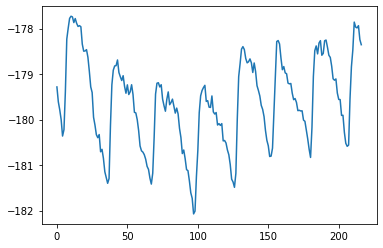

In [92]:
ppg_inverted = -ppg
plt.plot(ppg_inverted)

### <div style="color:#fbb144">   6. Filter the Signal</div>
A band-pass filter can be applied to improve the quality of the signal and also remove the DC offset.
Using the [BioSPPy](https://github.com/PIA-Group/BioSPPy) toolbox this is simple to do.

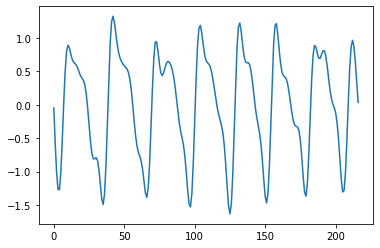

In [93]:
ppg_filtered, _, _ = st.filter_signal(
    signal=ppg_inverted,
    ftype="butter",
    band="bandpass",
    order=4,
    frequency=[0.7, 4],
    sampling_rate=fs,
    color="#00bfc2"
)
plt.plot(ppg_filtered)

# III. Explore
<br>
<div class='h1'  style="width:100%; background:linear-gradient(to right,#FDC86E,#fbb144);color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" > </div>

### <div style="color:#fbb144">  1. Challenge </div>
* Try to compute the heart rate from the acquired PPG signal. 

<div style="height:100px; background:white;border-radius:10px;text-align:center"> 

<a> <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/IT.png?raw=true" alt="it" style=" bottom: 0; width:250px;
    display: inline;
    left: 250px;
    position: absolute;"/> </a>
<img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/IST.png?raw=true"
         alt="alternate text" 
         style="position: relative;   width:250px; float: left;
    position: absolute;
    display: inline;
    bottom: 0;
    right: 100;"/>
</div> 

<div style="width: 100%; ">
<div style="background:linear-gradient(to right,#FDC86E,#fbb144);color:white;font-family:'arial', monospace; text-align: center; padding: 50px 0; border-radius:10px; height:10px; width:100%; float:left " >
<span style="font-size:12px;position:relative; top:-25px">  Please provide us your feedback <span style="font-size:14px;position:relative;COLOR:WHITE"> <a href="https://forms.gle/C8TdLQUAS9r8BNJM8">here</a>.</span></span> 
<br>
<span style="font-size:17px;position:relative; top:-20px">  Suggestions are welcome! </span> 
</div>

```Contributors: Afonso Raposo```